In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.config import DATA_DIRECTORY


def get_last_ended_action(group):
    """Return the enforcement action with the most recent VIOL_END_DATE"""
    return group.sort_values(by='ENF_ACTION_ISSUE_DATE', ascending=False).iloc[0]


pd.set_option("display.max_columns", 999)

# Load the table of compliance violations

In [3]:
df = pd.read_csv(DATA_DIRECTORY / 'interim' / 'hr2w_exceedance.csv')

### A sample of violations

In [4]:
df.sample(10)

,REGULATING_AGENCY,WATER_SYSTEM_NUMBER,WATER_SYSTEM_NAME,CLASSIFICATION,POPULATION,SERVICE_CONNECTIONS,COUNTY,CITY,ZIPCODE,VIOLATION_NUMBER,VIOLATION_TYPE_NAME,ANALYTE_NAME,RESULT,MCL,VIOL_BEGIN_DATE,VIOL_END_DATE,ENF_ACTION_NUMBER,ENF_ACTION_ISSUE_DATE,ENF_ACTION_TYPE_ISSUED
5846,DISTRICT 24 - TULARE,CA5400616,LEMON COVE WATER CO,COMMUNITY,109,60,TULARE,LEMON COVE,93244,9800004,"MCL, SINGLE SAMPLE",NITRATE,13.8 MG/L,10 MG/L,2015-10-01,2015-12-31,1204165,2015-11-05,FORMAL ENFORCEMENT ACTION ISSUED
661,DISTRICT 23 - FRESNO,CA1009006,PAPPAS & CO (COALINGA),COMMUNITY,25,11,FRESNO,FRESNO,93711,9800024,MONTHLY COMB. FILTER EFFLUENT (SWTR,TURBIDITY,,,2015-04-01,2015-04-30,9600034,2015-07-07,INFORMAL ENFORCEMENT ACTION ISSUED
3726,LPA57 - MONTEREY COUNTY,CA2700799,VISTA DEL TORO WS,COMMUNITY,87,29,MONTEREY,SALINAS,93908,1400025,"MCL, SINGLE SAMPLE",ARSENIC,.015 MG/L,0.010 MG/L,2013-10-01,2013-12-31,1606156,2015-10-01,FORMAL ENFORCEMENT ACTION ISSUED
641,DISTRICT 23 - FRESNO,CA1009006,PAPPAS & CO (COALINGA),COMMUNITY,25,11,FRESNO,FRESNO,93711,9800012,"MCL, AVERAGE",TTHM,0.145 MG/L,0.080 MG/L,2013-10-01,2013-12-31,923027,2008-10-30,FORMAL ENFORCEMENT ACTION ISSUED
4082,LPA57 - MONTEREY COUNTY,CA2701241,ENCINAL RD WS #01,COMMUNITY,41,18,MONTEREY,SALINAS,93908,1600033,"MCL, SINGLE SAMPLE",NITRATE,45 MG/L,10 MG/L,2016-07-01,2016-09-30,1305698,2013-06-10,OTHER INFORMAL ENFORCEMENT ACTION TAKEN
4739,LPA66 - SAN BERNARDINO COUNTY,CA3600086,DAGGETT COMM SVCS DIST,COMMUNITY,795,195,SAN BERNARDINO,DAGGETT,92327,1300006,"MCL, AVERAGE",COMBINED URANIUM,32.5 PCI/L,20 PCI/L,2018-10-01,2018-12-31,1300090,2017-11-22,FORMAL ENFORCEMENT ACTION ISSUED
4707,LPA66 - SAN BERNARDINO COUNTY,CA3600012,APPLE VALLEY VIEW MWC,COMMUNITY,275,81,SAN BERNARDINO,APPLE VALLEY,92307,1700022,"MCL, AVERAGE",FLUORIDE,2.8 MG/L,2 MG/L,2018-07-01,2018-09-30,1400125,2017-07-14,FORMAL ENFORCEMENT ACTION ISSUED
1173,DISTRICT 23 - FRESNO,CA1010044,"HURON, CITY OF",COMMUNITY,7306,876,FRESNO,HURON,93234,9611013,"MCL, AVERAGE",TOTAL HALOACETIC ACIDS (HAA5),0.0802 MG/L,0.060 MG/L,2014-07-01,2014-09-30,9712012,2014-10-06,FORMAL ENFORCEMENT ACTION ISSUED
1390,DISTRICT 12 - VISALIA,CA1500378,MAHER MUTUAL WATER COMPANY,COMMUNITY,150,50,KERN,BAKERSFIELD,93312,9812028,"MCL, AVERAGE",ARSENIC,0.021 MG/L,0.010 MG/L,2017-07-01,2017-09-30,9819011,2015-05-26,FORMAL ENFORCEMENT ACTION ISSUED
3210,DISTRICT 11 - MERCED,CA2010007,HILLVIEW WC-OAKHURST/SIERRA LAKES,COMMUNITY,3818,1043,MADERA,OAKHURST,93644,9911015,"MCL, AVERAGE",ARSENIC,0.031 MG/L,0.010 MG/L,2014-01-01,2014-03-31,9911011,2016-01-25,STATE INTENTIONAL NO ACTION TAKEN


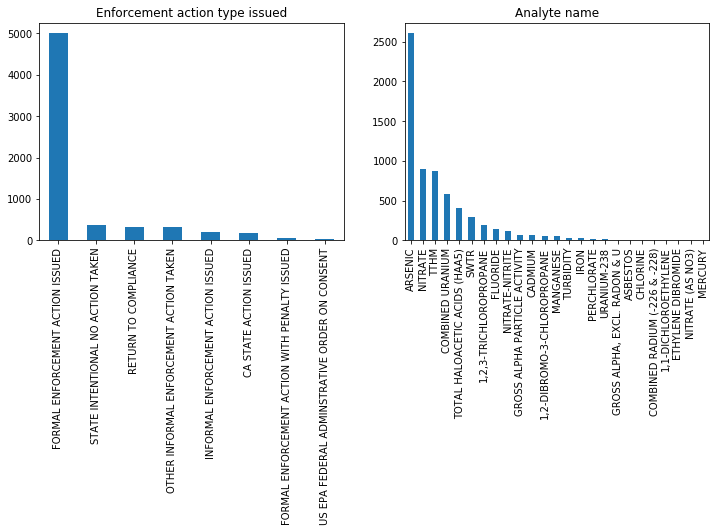

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
df.ENF_ACTION_TYPE_ISSUED.value_counts().plot.bar(title='Enforcement action type issued', ax=axs[0]);
df.ANALYTE_NAME.value_counts().plot.bar(title='Analyte name', ax=axs[1]);

In [6]:
df.ENF_ACTION_TYPE_ISSUED.value_counts()

FORMAL ENFORCEMENT ACTION ISSUED                 5009
STATE INTENTIONAL NO ACTION TAKEN                 356
RETURN TO COMPLIANCE                              329
OTHER INFORMAL ENFORCEMENT ACTION TAKEN           311
INFORMAL ENFORCEMENT ACTION ISSUED                204
CA STATE ACTION ISSUED                            169
FORMAL ENFORCEMENT ACTION WITH PENALTY ISSUED      62
US EPA FEDERAL ADMINSTRATIVE ORDER ON CONSENT      27
Name: ENF_ACTION_TYPE_ISSUED, dtype: int64

In [7]:
groups = df.groupby(['WATER_SYSTEM_NUMBER', 'ANALYTE_NAME'])
last_ended_action = groups.apply(get_last_ended_action)

Do not include water system/analyte combinations that ended with a return to compliance

In [8]:
last_ended_action = last_ended_action[last_ended_action.ENF_ACTION_TYPE_ISSUED != 'RETURN TO COMPLIANCE']
last_ended_action.reset_index(drop=True, inplace=True)

# There are 324 water systems with at least one analyte out of compliance

In [9]:
groups = last_ended_action.groupby('WATER_SYSTEM_NUMBER')
print(f"{len(groups)} water systems with at least one analyte out of compliance")

324 water systems with at least one analyte out of compliance


We also compute a histogram of number of water systems with different numbers of analytes out of compliance.

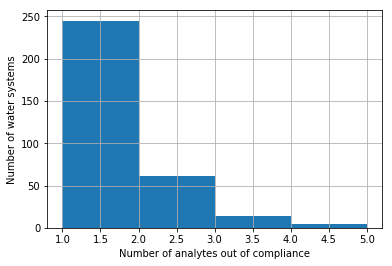

In [10]:
fig, ax = plt.subplots();
counts = groups.apply(lambda x: len(x)).sort_values(ascending=False)
counts.hist(bins=np.arange(1, max(counts) + 1, 1));
ax.set_xlabel('Number of analytes out of compliance');
ax.set_ylabel('Number of water systems');